In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing dataset
dataset = pd.read_csv("01-Non Linear Regression.csv")
dataset.head(3)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10


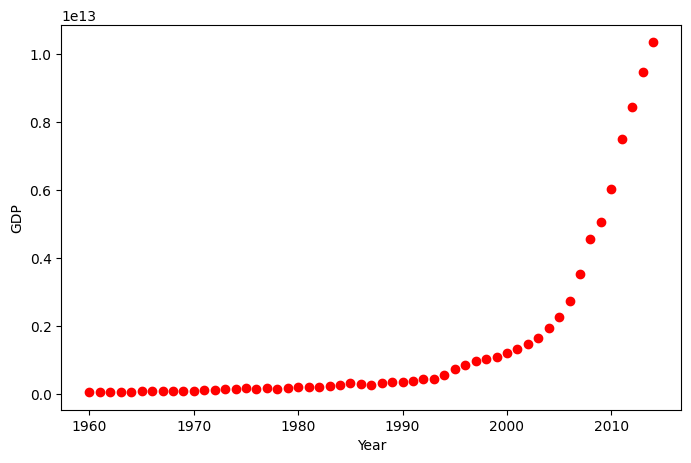

In [3]:
plt.figure(figsize=(8,5))
X_data, y_data = (dataset["Year"].values, dataset["Value"].values)
plt.plot(X_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choosing Logistic Model

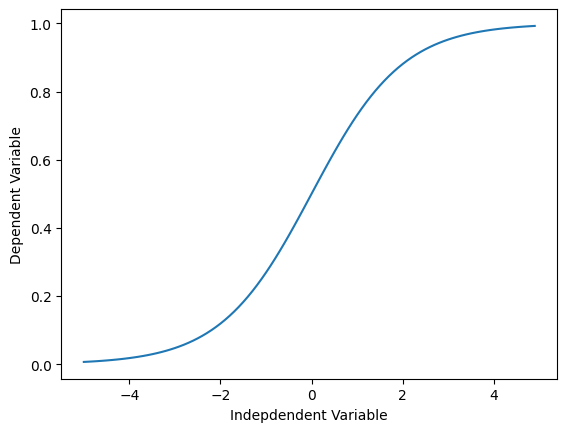

In [4]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [5]:
# Buliding the model 
def sigmoid(X, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(X-Beta_2)))
     return y

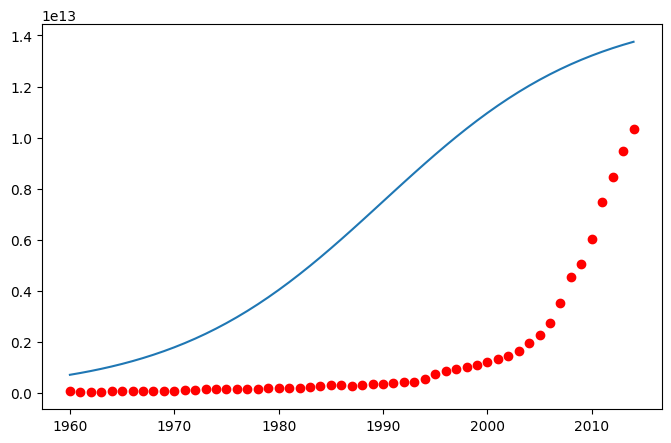

In [6]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(X_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.figure(figsize=(8,5))
plt.plot(X_data, Y_pred*15000000000000.)
plt.plot(X_data, y_data, 'ro')
plt.show()

In [7]:
# Lets normalize our data
xdata =X_data/max(X_data)
ydata =y_data/max(y_data)
max(y_data)

np.float64(10354831729340.4)

In [8]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)  # pcov is the covariance, popt is the optimized parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

popt , pcov

 beta_1 = 690.451712, beta_2 = 0.997207


(array([690.45171182,   0.99720713]),
 array([[ 1.52271494e+03, -2.88118935e-04],
        [-2.88118935e-04,  7.25961451e-09]]))

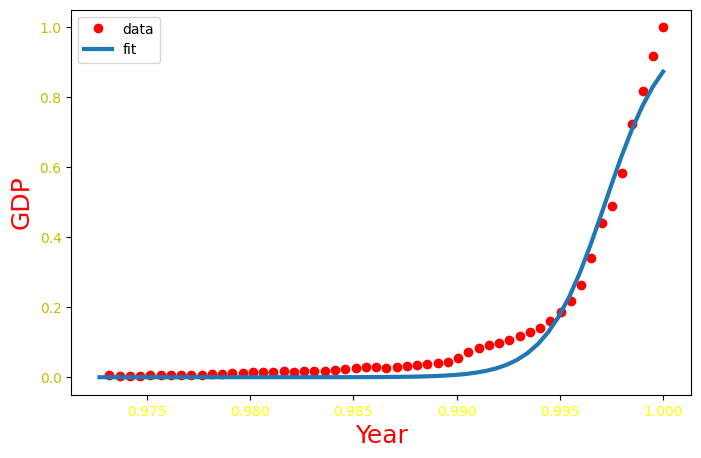

In [9]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, popt[0], popt[1])
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP', color='r', fontsize = 18)
plt.xlabel('Year', color='r', fontsize = 18)
plt.xticks(color ='yellow')
plt.yticks(color = 'y')
plt.show()

### Polynomial Regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [11]:
XX = dataset['Year'].values.reshape(-1, 1)
yy = dataset['Value'].values

In [12]:
# Create polynomial features
degree = 3  # Degree of the polynomial (you can adjust this value)
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(XX)

In [13]:
model = LinearRegression()
model.fit(X_poly, yy)

LinearRegression()

In [14]:
# Make predictions
y_pred = model.predict(X_poly)

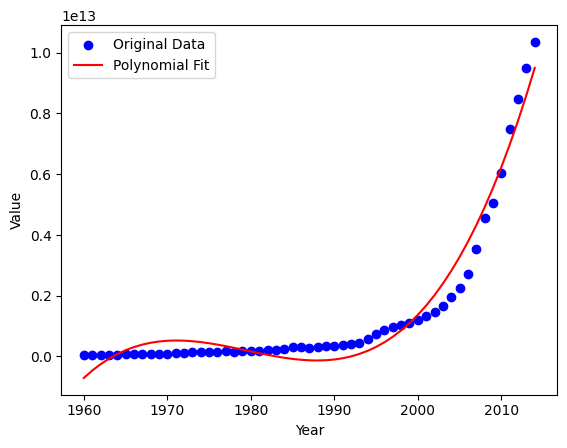

In [15]:
plt.scatter(dataset['Year'], dataset['Value'], color='blue', label='Original Data')
plt.plot(dataset['Year'], y_pred, color='red', label='Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()